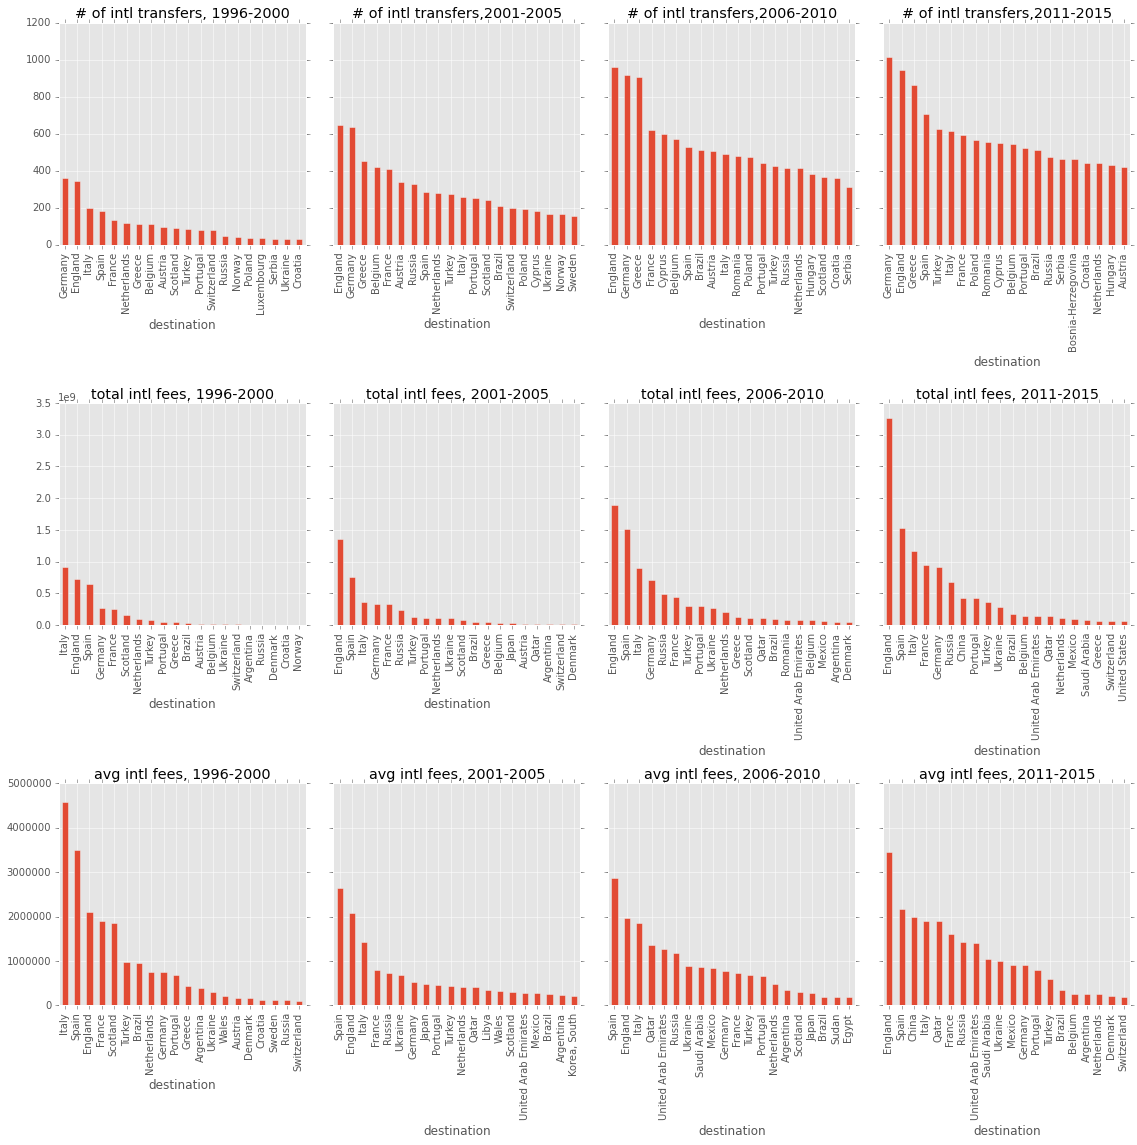

In [64]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 16),sharex=False,sharey='row')

t=nonloans[(nonloans.fromCountry!=nonloans.toCountry)].rename(columns={'toCountry':'destination'}).groupby(['period','destination'])['feeValue'].count()
t['(1995, 2000]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[0,0],title='# of intl transfers, 1996-2000')
t['(2000, 2005]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[0,1],title='# of intl transfers,2001-2005')
t['(2005, 2010]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[0,2],title='# of intl transfers,2006-2010') 
t['(2010, 2015]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[0,3],title='# of intl transfers,2011-2015') 

s=nonloans[(nonloans.fromCountry!=nonloans.toCountry)].rename(columns={'toCountry':'destination'}).groupby(['period','destination'])['feeValue'].sum()
s['(1995, 2000]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[1,0],title='total intl fees, 1996-2000')
s['(2000, 2005]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[1,1],title='total intl fees, 2001-2005')
s['(2005, 2010]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[1,2],title='total intl fees, 2006-2010') 
s['(2010, 2015]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[1,3],title='total intl fees, 2011-2015') 

r=nonloans[(nonloans.fromCountry!=nonloans.toCountry)].rename(columns={'toCountry':'destination'}).groupby(['period','destination'])['feeValue'].mean()
r['(1995, 2000]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[2,0],title='avg intl fees, 1996-2000')
r['(2000, 2005]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[2,1],title='avg intl fees, 2001-2005')
r['(2005, 2010]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[2,2],title='avg intl fees, 2006-2010') 
r['(2010, 2015]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[2,3],title='avg intl fees, 2011-2015') 

plt.tight_layout()


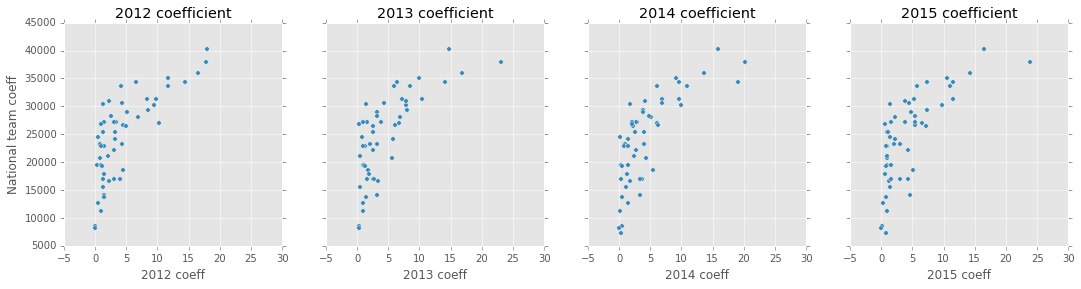

In [162]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 4),sharex=True,sharey='row')

country_coeff.join(natteam_coeff).plot.scatter('2012 coeff','National team coeff',ax=axes[0],title='2012 coefficient')
country_coeff.join(natteam_coeff).plot.scatter('2013 coeff','National team coeff',ax=axes[1],title='2013 coefficient')
country_coeff.join(natteam_coeff).plot.scatter('2014 coeff','National team coeff',ax=axes[2],title='2014 coefficient')
country_coeff.join(natteam_coeff).plot.scatter('2015 coeff','National team coeff',ax=axes[3],title='2015 coefficient')

In [386]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from urllib2 import urlopen, Request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import os.path 
import datetime 
import math
import matplotlib.pyplot as plt

transfers = pd.read_csv('../data/merged/transfers_q.csv')
loans = pd.read_csv('../data/merged/loans.csv')
nonloans = pd.read_csv('../data/merged/nonloans.csv')
players=pd.read_csv('../data/merged/players.csv')

leagueCodeMapping = {'GB1':'Premier League (England)','FR1':'Ligue 1 (France)',
                                                         'ES1':'La Liga (Spain)','IT1':'Serie A (Italy)','L1':'Bundesliga (Germany)',
                                                         'PO1':'Primeira Liga (Portugal)','NL1':'Eredivisie (Netherlands)'}

teamIdMap = pd.concat([transfers[['toTeamId','toTeamName','season']].rename(columns={'toTeamId':'teamId','toTeamName':'teamName'}),
    transfers[['fromTeamId','fromTeamName','season']].rename(columns={'fromTeamId':'teamId','fromTeamName':'teamName'})],ignore_index=True) \
    .sort_values('season',ascending=False).drop_duplicates('teamId').set_index('teamId')['teamName'].to_dict()
    
agentIdMap = transfers[['playersAgentId','playersAgent']].sort_values('playersAgent',ascending=False).drop_duplicates('playersAgentId').set_index('playersAgentId')['playersAgent'].to_dict()

leagueList = ['GB1','ES1','L1','IT1','FR1','PO1','NL1','TR1','RU1','BE1','MLS1','UKR1','GR1','RO1','ZYP1','KR1','SER1','BOS1','BU1','DK1','SE1','NO1','LI1','SC1','ISR1','PL1','UNG1','A1','C1','MAL1','KAS1','TS1','SLO1','SL1','FI1','LUX1','AZ1','IR1']

countryInfo=pd.read_excel('../data/reference/countries.xls').set_index('country')

top20clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:20].index
top50clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:50].index
top100clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:100].index

uefa=countryInfo[countryInfo.federation=='UEFA'].index
caf=countryInfo[countryInfo.federation=='CAF'].index
concacaf=countryInfo[countryInfo.federation=='CONCACAF'].index
concacaf_no_uscan=countryInfo[countryInfo.federation=='CONCACAF'].drop(['United States','Canada']).index
conmebol=countryInfo[countryInfo.federation=='CONMEBOL'].index
afc=countryInfo[countryInfo.federation=='AFC'].index
afc_no_anzac=countryInfo[countryInfo.federation=='AFC'].drop(['Australia','New Zealand']).index

country_coeff=pd.read_table('../data/reference/country_coefficient.csv').reset_index(drop=True)
country_coeff.columns=['Movement','Country','2012 coeff','2013 coeff','2014 coeff','2015 coeff','2016 coeff','Total coeff','Teams Total','CL','EL','Total']
country_coeff=country_coeff.drop(['Movement','2016 coeff','CL','EL','Total','Teams Total','Total coeff'],axis=1)
country_coeff['Country']=country_coeff['Country'].str.split('\(L',expand=True)[0].str.strip()
country_coeff=country_coeff.set_index('Country')
country_coeff = country_coeff.join(DataFrame({'total coeff':country_coeff.sum(axis=1)}))

natteam_coeff=pd.read_table('../data/reference/national_team_coefficient.csv').reset_index(drop=True).drop('Rank',axis=1)
natteam_coeff['Country']=natteam_coeff['Country'].str.strip()
natteam_coeff.Coefficient=natteam_coeff.Coefficient.apply(lambda s: int(s.replace(',','')))
natteam_coeff=natteam_coeff.rename(columns={'Coefficient':'National team coeff'}).set_index('Country')

club_coeff=pd.read_table('../data/reference/club_coefficient.csv').reset_index(drop=True).set_index('Club')
club_coeff=club_coeff.drop(['2017','2016','Mvmt','Total'],axis=1)
club_coeff.Association = club_coeff.Association.str.split(expand=True)[0]
# sanity check: club_coeff.merge(DataFrame({'Team Name':teamIdMap}),how='left',left_on='Team Id',right_index=True)
club_coeff=club_coeff.reset_index().set_index('Team Id')

gdp=pd.read_table('../data/reference/country_gdp.csv').reset_index(drop=True).drop('2014 Rank',axis=1).rename(columns={'Country ':'Country'})
gdp.Country=gdp.Country.str.strip()
gdp=gdp.set_index('Country')
gdp.columns=['GDP '+c for c in gdp.columns.str.strip()]
for column in gdp.columns:
    gdp[column]=gdp[column].apply(lambda s: float(str(s).replace(',','')))
    
unemployed=pd.read_table('../data/reference/country_unemployment.csv').drop(['Date','Employment rate'],axis=1)
unemployed.columns=['Country','Unemployment']
unemployed['Country']=unemployed['Country'].str.split(' ').apply(lambda arr: ' '.join(arr[:len(arr)/2]))
unemployed=unemployed.set_index('Country').rename(index={'United Kingdom':'England'})

corruption=pd.read_table('../data/reference/country_corruption.csv').drop(['Rank'],axis=1)
corruption.Country=corruption.Country.str.strip()
corruption=corruption.set_index('Country')
corruption=corruption[corruption.columns[:1]].rename(columns={'2015 score':'Corruption'}).rename(index={'United Kingdom':'England'})

population=pd.read_table('../data/reference/country_population.csv').drop(['Rank'],axis=1)
population.columns=population.columns.str.strip()
population.Country=population.Country.str.split('[',expand=True)[0].str.strip()
population['Population']=population['Population'].apply(lambda s: float(str(s).replace(',','')))
population=population[['Country','Population','Growth %']].set_index('Country').rename(index={'United Kingdom':'England'})

In [271]:
%ls ../data/reference/

club_coefficient.csv           country_coefficient.csv        country_gdp.csv                country_unemployment.csv
countries.xls                  country_corruption.csv         country_population.csv         national_team_coefficient.csv


In [267]:
t=nonloans[(nonloans.season>2000)&(nonloans.fromCountry!=nonloans.toCountry)]

meanFeePeriod = t.groupby(['toCountry','period']).feeValue.mean().unstack()
meanFeePeriod.columns = [('avg intl fee '+str(col)) for col in meanFeePeriod.columns.tolist()]
totalFeePeriod = t.groupby(['toCountry','period']).feeValue.sum().unstack()
totalFeePeriod.columns = [('total intl fees '+str(col)) for col in totalFeePeriod.columns.tolist()]
paidTransfersPeriod = t[t.feeValue>0].groupby(['toCountry','period']).id.count().unstack()
paidTransfersPeriod.columns = [('# of paid intl transfers '+str(col)) for col in paidTransfersPeriod.columns.tolist()]
freeTransfersPeriod = t[t.feeValue==0].groupby(['toCountry','period']).id.count().unstack()
freeTransfersPeriod.columns = [('# of free intl transfers '+str(col)) for col in freeTransfersPeriod.columns.tolist()]

joinedTransfersPeriod=freeTransfersPeriod.join(paidTransfersPeriod)

for period in ['(2000, 2005]','(2005, 2010]','(2010, 2015]']:
    joinedTransfersPeriod['% of paid intl transfers '+period]= (1 / (1+joinedTransfersPeriod['# of free intl transfers '+period]/joinedTransfersPeriod['# of paid intl transfers '+period])).fillna(0)

fulljoin=natteam_coeff.join(joinedTransfersPeriod).join(meanFeePeriod).join(totalFeePeriod)

meanFeeTotal = t.groupby(['toCountry'])[['feeValue']].mean()
meanFeeTotal.columns = ['avg intl fee']
totalFeeTotal = t.groupby(['toCountry'])[['feeValue']].sum()
totalFeeTotal.columns = ['total intl fees']
paidTransfersTotal = t[t.feeValue>0].groupby(['toCountry'])[['id']].count()
paidTransfersTotal.columns = ['# of paid intl transfers']
freeTransfersTotal = t[t.feeValue==0].groupby(['toCountry'])[['id']].count()
freeTransfersTotal.columns = ['# of free intl transfers']

joinedTransfersTotal=freeTransfersTotal.join(paidTransfersTotal)
joinedTransfersTotal['% of paid intl transfers']= (1 / (1+joinedTransfersTotal['# of free intl transfers']/joinedTransfersTotal['# of paid intl transfers'])).fillna(0)
fulljoin=fulljoin.join(joinedTransfersTotal).join(meanFeeTotal).join(totalFeeTotal)

fulljoin.to_excel('../data/output/country_summary.xlsx')
fulljoin

,Club,Association,2012–13,2013–14,2014–15,2015–16,2016–17
Team Id,,,,,,,
418,Real Madrid,Spain,29.5428,39.6000,33.0428,37.7856,4.4570
27,Bayern Munich,Germany,36.5856,29.9428,31.1714,32.2856,4.3428
131,Barcelona,Spain,27.5428,28.6000,38.0428,30.7856,4.4570
13,Atlético Madrid,Spain,13.5428,37.6000,26.0428,32.7856,4.4570
506,Juventus,Italy,25.8832,25.8332,32.8000,20.3000,4.2666
583,Paris Saint-Germain,France,27.3500,26.7000,23.1832,26.2166,4.2666
16,Borussia Dortmund,Germany,33.5856,24.9428,21.1714,20.2856,4.3428
631,Chelsea,England,30.2856,28.3570,23.7142,20.8500,0.3428
294,Benfica,Portugal,28.3500,30.9832,9.8166,24.1000,4.2666
